In [ ]:
!pip3 install pytimeparse

# **IMPORT**

In [ ]:
import pandas as pd
import matplotlib
import datetime
import pytimeparse
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting._misc import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy.special import erfinv
from scipy import stats

In [ ]:
df = pd.read_csv("final_merged_data.csv")

In [ ]:
df

,User,Name,Url,Forks,Project Size,Contributors,Avg Created Repos Out,Avg Forked Repos Out,Total Closed Issues,Avg Latency,Avg Comments,Day,month,year,Age,filename
0,fossasia,pslab-hardware,https://github.com/fossasia/pslab-hardware.git,82,123783,7,38.285714,25.285714,50,128 days 13:23:59.400000,1.320000,28,3,2017,1678,repositories_03_2017.csv
1,Devlight,ShadowLayout,https://github.com/Devlight/ShadowLayout.git,135,205,4,22.250000,16.500000,4,35 days 12:10:55.750000,3.000000,25,4,2016,2015,repositories_04_2016.csv
2,YunYang1994,TensorFlow2.0-Examples,https://github.com/YunYang1994/TensorFlow2.0-E...,664,10631,3,13.500000,9.000000,29,12 days 01:43:45.344827586,1.034483,7,3,2019,969,repositories_03_2019.csv
3,JakeWharton,adb-event-mirror,https://github.com/JakeWharton/adb-event-mirro...,40,3590,2,16.000000,0.000000,5,11 days 16:45:31.400000,4.400000,10,7,2020,478,repositories_07_2020.csv
4,SpectralOps,preflight,https://github.com/SpectralOps/preflight.git,31,3484,2,12.000000,8.000000,0,0,0.000000,29,4,2021,185,repositories_04_2021.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12878,GitbookIO,markup-it,https://github.com/GitbookIO/markup-it.git,49,2505,10,44.222222,24.222222,37,29 days 05:28:03.027027,0.648649,10,3,2016,2061,repositories_03_2016.csv
12879,gathertown,mapmaking,https://github.com/gathertown/mapmaking.git,56,1069896,14,1.000000,0.250000,6,67 days 10:07:32.200000,3.000000,19,8,2020,438,repositories_08_2020.csv
12880,IliasHad,makerlapse-app,https://github.com/IliasHad/makerlapse-app.git,7,14416,12,18.500000,11.833333,3,36 days 12:48:54,1.666667,6,8,2019,817,repositories_08_2019.csv
12881,sowdust,searchbook,https://github.com/sowdust/searchbook.git,48,3004,1,11.000000,6.000000,18,1 days 17:15:02.529411,3.529412,17,6,2019,867,repositories_06_2019.csv


In [ ]:
df = df[df['Avg Latency'] != '0']
df = df.reset_index(drop = True)
df

,User,Name,Url,Forks,Project Size,Contributors,Avg Created Repos Out,Avg Forked Repos Out,Total Closed Issues,Avg Latency,Avg Comments,Day,month,year,Age,filename
0,fossasia,pslab-hardware,https://github.com/fossasia/pslab-hardware.git,82,123783,7,38.285714,25.285714,50,128 days 13:23:59.400000,1.320000,28,3,2017,1678,repositories_03_2017.csv
1,Devlight,ShadowLayout,https://github.com/Devlight/ShadowLayout.git,135,205,4,22.250000,16.500000,4,35 days 12:10:55.750000,3.000000,25,4,2016,2015,repositories_04_2016.csv
2,YunYang1994,TensorFlow2.0-Examples,https://github.com/YunYang1994/TensorFlow2.0-E...,664,10631,3,13.500000,9.000000,29,12 days 01:43:45.344827586,1.034483,7,3,2019,969,repositories_03_2019.csv
3,JakeWharton,adb-event-mirror,https://github.com/JakeWharton/adb-event-mirro...,40,3590,2,16.000000,0.000000,5,11 days 16:45:31.400000,4.400000,10,7,2020,478,repositories_07_2020.csv
4,mrdbourke,tensorflow-deep-learning,https://github.com/mrdbourke/tensorflow-deep-l...,690,237838,14,17.500000,6.700000,7,2 days 19:56:02.142857142,2.428571,23,11,2020,342,repositories_11_2020.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,GitbookIO,markup-it,https://github.com/GitbookIO/markup-it.git,49,2505,10,44.222222,24.222222,37,29 days 05:28:03.027027,0.648649,10,3,2016,2061,repositories_03_2016.csv
10377,gathertown,mapmaking,https://github.com/gathertown/mapmaking.git,56,1069896,14,1.000000,0.250000,6,67 days 10:07:32.200000,3.000000,19,8,2020,438,repositories_08_2020.csv
10378,IliasHad,makerlapse-app,https://github.com/IliasHad/makerlapse-app.git,7,14416,12,18.500000,11.833333,3,36 days 12:48:54,1.666667,6,8,2019,817,repositories_08_2019.csv
10379,sowdust,searchbook,https://github.com/sowdust/searchbook.git,48,3004,1,11.000000,6.000000,18,1 days 17:15:02.529411,3.529412,17,6,2019,867,repositories_06_2019.csv


# **Outlier Detection**

In [ ]:
features = ['Project Size','Contributors','Avg Created Repos Out','Total Closed Issues','Avg Comments','Age','Forks']
X = df[['Url'] + features]
X

,Url,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,https://github.com/fossasia/pslab-hardware.git,123783,7,38.285714,50,1.320000,1678,82
1,https://github.com/Devlight/ShadowLayout.git,205,4,22.250000,4,3.000000,2015,135
2,https://github.com/YunYang1994/TensorFlow2.0-E...,10631,3,13.500000,29,1.034483,969,664
3,https://github.com/JakeWharton/adb-event-mirro...,3590,2,16.000000,5,4.400000,478,40
4,https://github.com/mrdbourke/tensorflow-deep-l...,237838,14,17.500000,7,2.428571,342,690
...,...,...,...,...,...,...,...,...
10376,https://github.com/GitbookIO/markup-it.git,2505,10,44.222222,37,0.648649,2061,49
10377,https://github.com/gathertown/mapmaking.git,1069896,14,1.000000,6,3.000000,438,56
10378,https://github.com/IliasHad/makerlapse-app.git,14416,12,18.500000,3,1.666667,817,7
10379,https://github.com/sowdust/searchbook.git,3004,1,11.000000,18,3.529412,867,48


In [ ]:
top_percentile = 0.975
X_final_right_chopped = X[ (X['Age'] < X['Age'].quantile(top_percentile)) & \
                          (X['Contributors'] < X['Contributors'].quantile(top_percentile)) & \
                          (X['Forks'] < X['Forks'].quantile(top_percentile)) & \
                          (X['Total Closed Issues'] < X['Total Closed Issues'].quantile(top_percentile)) & \
                          (X['Avg Created Repos Out'] < X['Avg Created Repos Out'].quantile(top_percentile)) & \
                          (X['Avg Comments'] < X['Avg Comments'].quantile(top_percentile)) & \
                          (X['Project Size'] < X['Project Size'].quantile(top_percentile))
                          ]

In [ ]:
X_final_right_chopped = X_final_right_chopped.reset_index(drop = True)
X_final_right_chopped

,Url,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,https://github.com/fossasia/pslab-hardware.git,123783,7,38.285714,50,1.320000,1678,82
1,https://github.com/Devlight/ShadowLayout.git,205,4,22.250000,4,3.000000,2015,135
2,https://github.com/YunYang1994/TensorFlow2.0-E...,10631,3,13.500000,29,1.034483,969,664
3,https://github.com/JakeWharton/adb-event-mirro...,3590,2,16.000000,5,4.400000,478,40
4,https://github.com/mrdbourke/tensorflow-deep-l...,237838,14,17.500000,7,2.428571,342,690
...,...,...,...,...,...,...,...,...
8844,https://github.com/QData/TextAttack.git,26416,46,12.100000,145,3.062069,747,216
8845,https://github.com/GitbookIO/markup-it.git,2505,10,44.222222,37,0.648649,2061,49
8846,https://github.com/IliasHad/makerlapse-app.git,14416,12,18.500000,3,1.666667,817,7
8847,https://github.com/sowdust/searchbook.git,3004,1,11.000000,18,3.529412,867,48


In [ ]:
bottom_percentile = 0.025
X_final_total_chopped = X_final_right_chopped[ (X_final_right_chopped['Age'] > X['Age'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Contributors'] > X['Contributors'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Forks'] > X['Forks'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Total Closed Issues'] > X['Total Closed Issues'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Avg Created Repos Out'] > X['Avg Created Repos Out'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Avg Comments'] > X['Avg Comments'].quantile(bottom_percentile)) & \
                          (X_final_right_chopped['Project Size'] > X['Project Size'].quantile(bottom_percentile))
                          ]

In [ ]:
X_final_total_chopped = X_final_total_chopped.reset_index(drop =True)
X_final_total_chopped

,Url,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,https://github.com/fossasia/pslab-hardware.git,123783,7,38.285714,50,1.320000,1678,82
1,https://github.com/Devlight/ShadowLayout.git,205,4,22.250000,4,3.000000,2015,135
2,https://github.com/YunYang1994/TensorFlow2.0-E...,10631,3,13.500000,29,1.034483,969,664
3,https://github.com/JakeWharton/adb-event-mirro...,3590,2,16.000000,5,4.400000,478,40
4,https://github.com/mrdbourke/tensorflow-deep-l...,237838,14,17.500000,7,2.428571,342,690
...,...,...,...,...,...,...,...,...
6752,https://github.com/SpaceinvaderOne/Macinabox.git,143557,15,6.500000,31,3.129032,789,52
6753,https://github.com/daign/clipping-with-caps.git,197,2,17.000000,2,0.500000,1994,40
6754,https://github.com/QData/TextAttack.git,26416,46,12.100000,145,3.062069,747,216
6755,https://github.com/GitbookIO/markup-it.git,2505,10,44.222222,37,0.648649,2061,49


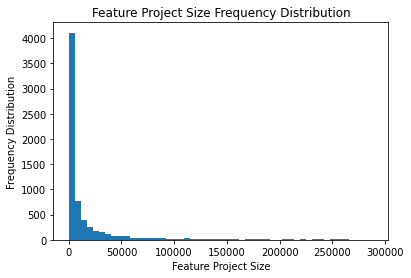

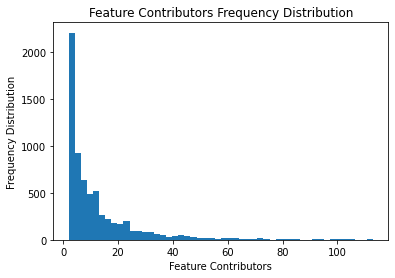

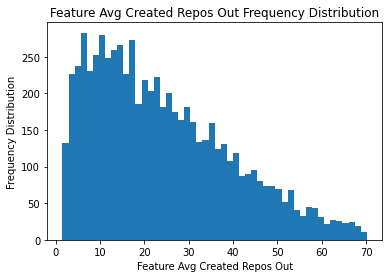

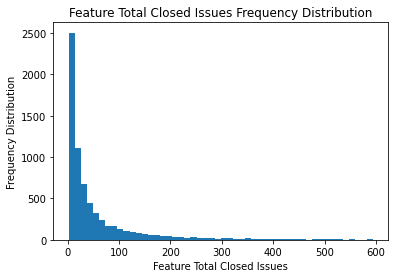

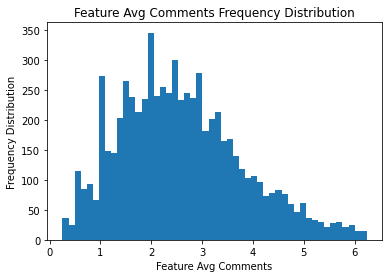

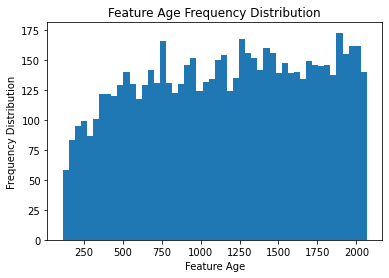

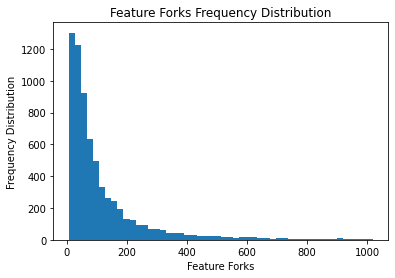

In [ ]:
for f in features:
  plt.figure()
  plt.title(f"Feature {f} Frequency Distribution")
  plt.xlabel(f"Feature {f}")
  plt.ylabel("Frequency Distribution")
  plt.hist(X_final_total_chopped[f],bins=50)
  plt.show()

# **Transforming Data**

## **PROJECT SIZE: Log**

In [ ]:
proj_size = X_final_total_chopped['Project Size']
proj_size.describe()

count      6757.000000
mean      17633.859997
std       38730.303991
min          29.000000
25%         622.000000
50%        3050.000000
75%       13992.000000
max      288404.000000
Name: Project Size, dtype: float64

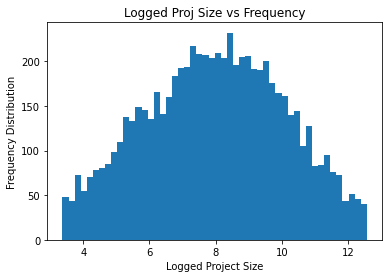

In [ ]:
plt.figure()
plt.xlabel("Logged Project Size")
plt.ylabel("Frequency Distribution")
plt.title("Logged Proj Size vs Frequency")
plt.hist(np.log(proj_size),bins=50)
plt.show()

## **OUTSIDE CREATED REPOS: Sqrt**

count    6757.000000
mean       24.069821
std        15.518323
min         1.555556
25%        11.500000
50%        21.100000
75%        34.250000
max        70.166667
Name: Avg Created Repos Out, dtype: float64


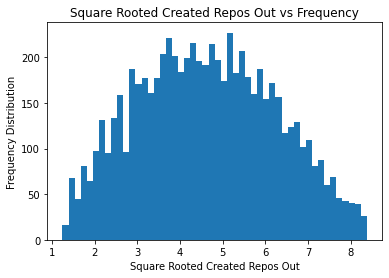

In [ ]:
out_created_repos = X_final_total_chopped['Avg Created Repos Out']
print(out_created_repos.describe())
plt.figure()
plt.xlabel("Square Rooted Created Repos Out")
plt.ylabel("Frequency Distribution")
plt.title("Square Rooted Created Repos Out vs Frequency")
plt.hist(np.sqrt(out_created_repos),bins=50)
plt.show()

## **FORKS: Logging**

count    6757.000000
mean      117.868581
std       147.884963
min         6.000000
25%        32.000000
50%        64.000000
75%       139.000000
max      1019.000000
Name: Forks, dtype: float64


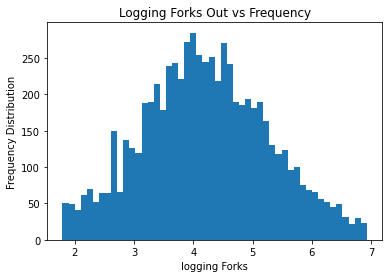

In [ ]:
forks = X_final_total_chopped['Forks']
print(forks.describe())
plt.figure()
plt.xlabel("logging Forks")
plt.ylabel("Frequency Distribution")
plt.title("Logging Forks Out vs Frequency")
plt.hist(np.log(forks),bins=50)
plt.show()

## **CLOSED ISSUES: Cbrt**

count    6757.000000
mean       55.931922
std        86.645042
min         2.000000
25%         8.000000
50%        22.000000
75%        62.000000
max       594.000000
Name: Total Closed Issues, dtype: float64


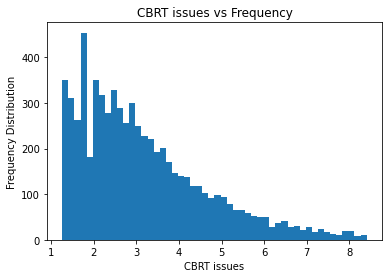

In [ ]:
issues = X_final_total_chopped['Total Closed Issues']
print(issues.describe())
plt.figure()
plt.xlabel("CBRT issues")
plt.ylabel("Frequency Distribution")
plt.title("CBRT issues vs Frequency")
plt.hist(np.cbrt(issues),bins=50)
plt.show()

## **Avg Comments: as usual**

count    6757.000000
mean        2.591179
std         1.209041
min         0.253731
25%         1.682927
50%         2.488372
75%         3.333333
max         6.240000
Name: Avg Comments, dtype: float64


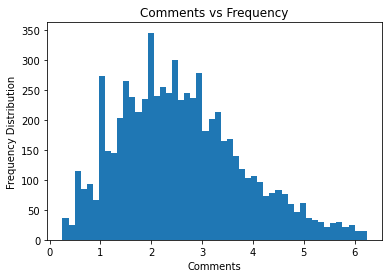

In [ ]:
comments = X_final_total_chopped['Avg Comments']
print(comments.describe())
plt.figure()
plt.xlabel("Comments")
plt.ylabel("Frequency Distribution")
plt.title("Comments vs Frequency")
plt.hist(comments,bins=50)
plt.show()

## **PROBLEMS: AGE AND TEAM SIZE**

### **AGE**

count    6757.000000
mean     1159.355187
std       542.721800
min       115.000000
25%       708.000000
50%      1177.000000
75%      1626.000000
max      2067.000000
Name: Age, dtype: float64


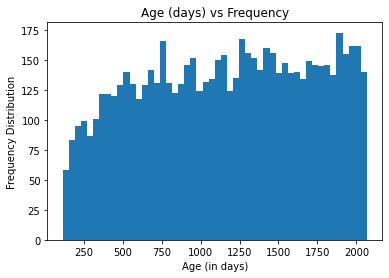

In [ ]:
# Can we use 
# Box Muller () and/or 
# Ref 1: https://rh8liuqy.github.io/Box_Muller_Algorithm.html
# Ref 2: https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
# Erfinv Transformation 
# Ref 1: (https://stackoverflow.com/questions/45296586/how-to-convert-uniform-normality-variables-in-python)
# Ref 2: (https://en.wikipedia.org/wiki/Error_function)?
age = X_final_total_chopped['Age'] #.apply(lambda x: x//12)
print(age.describe())
plt.figure()
plt.xlabel("Age (in days)")
plt.ylabel("Frequency Distribution")
plt.title("Age (days) vs Frequency")
plt.hist(age,bins=50)
plt.show()

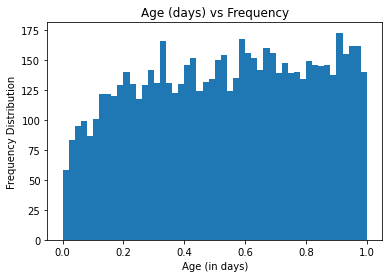

In [ ]:
scaler = MinMaxScaler(feature_range=(0.0001,0.99999))
normalized_age = scaler.fit_transform(age.values.reshape((-1,1)))
plt.figure()
plt.xlabel("Age (in days)")
plt.ylabel("Frequency Distribution")
plt.title("Age (days) vs Frequency")
plt.hist(normalized_age,bins=50)
plt.show()

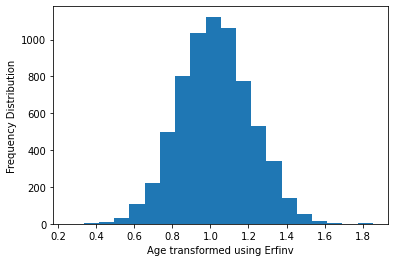

In [ ]:
Gauss = lambda x, mu, sigma: mu + np.sqrt(2)*sigma*erfinv(2*x-1)
plt.figure()
plt.xlabel("Age transformed using Erfinv")
plt.ylabel("Frequency Distribution")
plt.hist(Gauss(normalized_age, 1, 0.2), bins = 20)
plt.show()

In [ ]:
age_final = Gauss(normalized_age,1,0.2)
pd.Series(age_final.ravel()).describe()

count    6757.000000
mean        1.025579
std         0.188815
min         0.256197
25%         0.897332
50%         1.022152
75%         1.150479
max         1.852978
dtype: float64

### **Team Size**

count    6757.000000
mean       13.074293
std        15.816034
min         2.000000
25%         4.000000
50%         7.000000
75%        16.000000
max       113.000000
Name: Contributors, dtype: float64


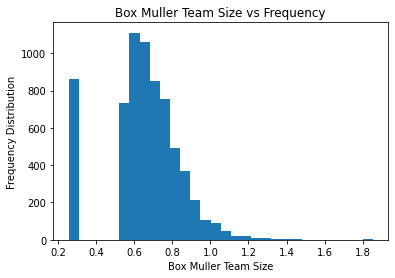

In [ ]:
# Try box-cox (Preferred) or yeo Johnson
Gauss = lambda x, mu, sigma: mu + np.sqrt(2)*sigma*erfinv(2*x-1)
team_size = X_final_total_chopped['Contributors']
scaler = MinMaxScaler(feature_range=(0.0001,0.99999))
team_size_scaled = scaler.fit_transform(team_size.values.reshape((-1,1)))
normal_team = Gauss(team_size_scaled,1,0.2)
print(team_size.describe())
plt.figure()
plt.xlabel("Box Muller Team Size")
plt.ylabel("Frequency Distribution")
plt.title("Box Muller Team Size vs Frequency")
plt.hist(normal_team,bins=30)
plt.show()

# **Prepare Data for Modelling**

In [ ]:
X_final = X_final_total_chopped.copy()
X_final['Project Size'] = np.log(X_final_total_chopped['Project Size'])
X_final['Avg Created Repos Out'] = np.sqrt(X_final_total_chopped['Avg Created Repos Out'])
X_final['Forks'] = np.log(X_final_total_chopped['Forks'])
X_final['Total Closed Issues'] = np.cbrt(X_final_total_chopped['Total Closed Issues'])
X_final['Avg Comments'] = X_final_total_chopped['Avg Comments']
X_final['Contributors'] = normal_team
X_final['Age'] = age_final
X_final

,Url,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,https://github.com/fossasia/pslab-hardware.git,11.726285,0.661216,6.187545,3.684031,1.320000,1.168846,4.406719
1,https://github.com/Devlight/ShadowLayout.git,5.323010,0.581137,4.716991,1.587401,3.000000,1.386508,4.905275
2,https://github.com/YunYang1994/TensorFlow2.0-E...,9.271530,0.527761,3.674235,3.072317,1.034483,0.968564,6.498282
3,https://github.com/JakeWharton/adb-event-mirro...,8.185907,0.256197,4.000000,1.709976,4.400000,0.821485,3.688879
4,https://github.com/mrdbourke/tensorflow-deep-l...,12.379345,0.752764,4.183300,1.912931,2.428571,0.761342,6.536692
...,...,...,...,...,...,...,...,...
6752,https://github.com/SpaceinvaderOne/Macinabox.git,11.874487,0.762184,2.549510,3.141381,3.129032,0.920418,3.951244
6753,https://github.com/daign/clipping-with-caps.git,5.283204,0.256197,4.123106,1.259921,0.500000,1.356329,3.688879
6754,https://github.com/QData/TextAttack.git,10.181725,0.947492,3.478505,5.253588,3.062069,0.908600,5.375278
6755,https://github.com/GitbookIO/markup-it.git,7.826044,0.708028,6.649979,3.332222,0.648649,1.547755,3.891820


In [ ]:
X_final_final = X_final.copy()
# X_final_final = X_final_final.drop(['Age','Contributors'],axis= 1)
X_final_final = X_final_final.reset_index(drop = True)
X_final_final

,Url,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,https://github.com/fossasia/pslab-hardware.git,11.726285,0.661216,6.187545,3.684031,1.320000,1.168846,4.406719
1,https://github.com/Devlight/ShadowLayout.git,5.323010,0.581137,4.716991,1.587401,3.000000,1.386508,4.905275
2,https://github.com/YunYang1994/TensorFlow2.0-E...,9.271530,0.527761,3.674235,3.072317,1.034483,0.968564,6.498282
3,https://github.com/JakeWharton/adb-event-mirro...,8.185907,0.256197,4.000000,1.709976,4.400000,0.821485,3.688879
4,https://github.com/mrdbourke/tensorflow-deep-l...,12.379345,0.752764,4.183300,1.912931,2.428571,0.761342,6.536692
...,...,...,...,...,...,...,...,...
6752,https://github.com/SpaceinvaderOne/Macinabox.git,11.874487,0.762184,2.549510,3.141381,3.129032,0.920418,3.951244
6753,https://github.com/daign/clipping-with-caps.git,5.283204,0.256197,4.123106,1.259921,0.500000,1.356329,3.688879
6754,https://github.com/QData/TextAttack.git,10.181725,0.947492,3.478505,5.253588,3.062069,0.908600,5.375278
6755,https://github.com/GitbookIO/markup-it.git,7.826044,0.708028,6.649979,3.332222,0.648649,1.547755,3.891820


In [ ]:
#REf: https://www.datasklr.com/ols-least-squares-regression/scaling-centering-and-standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler(with_mean=True,with_std = True)
X_final_final_scaled = X_final_final.copy()
X_final_final_scaled = X_final_final_scaled.drop(['Url'],axis = 1)
X_final_final_scaled = X_final_final_scaled.reset_index(drop = True)

X_final_final_scaled = pd.DataFrame(scaler.fit_transform(X_final_final_scaled), columns=X_final_final_scaled.columns)
X_final_final_scaled

,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,1.774067,0.050367,0.961518,0.353573,-1.051472,0.758825,0.187573
1,-1.259898,-0.351428,0.052820,-1.052908,0.338161,1.911689,0.657200
2,0.610968,-0.619247,-0.591529,-0.056783,-1.287642,-0.301981,2.157771
3,0.096584,-1.981825,-0.390229,-0.970681,1.496189,-1.080995,-0.488613
4,2.083496,0.509715,-0.276962,-0.834533,-0.134503,-1.399547,2.193952
...,...,...,...,...,...,...,...
6752,1.844287,0.556979,-1.286529,-0.010453,0.444892,-0.556989,-0.241473
6753,-1.278759,-1.981825,-0.314158,-1.272591,-1.729746,1.751845,-0.488613
6754,1.042232,1.486766,-0.712475,1.406478,0.389502,-0.619587,1.099931
6755,-0.073924,0.285248,1.247269,0.117569,-1.606789,2.765744,-0.297448


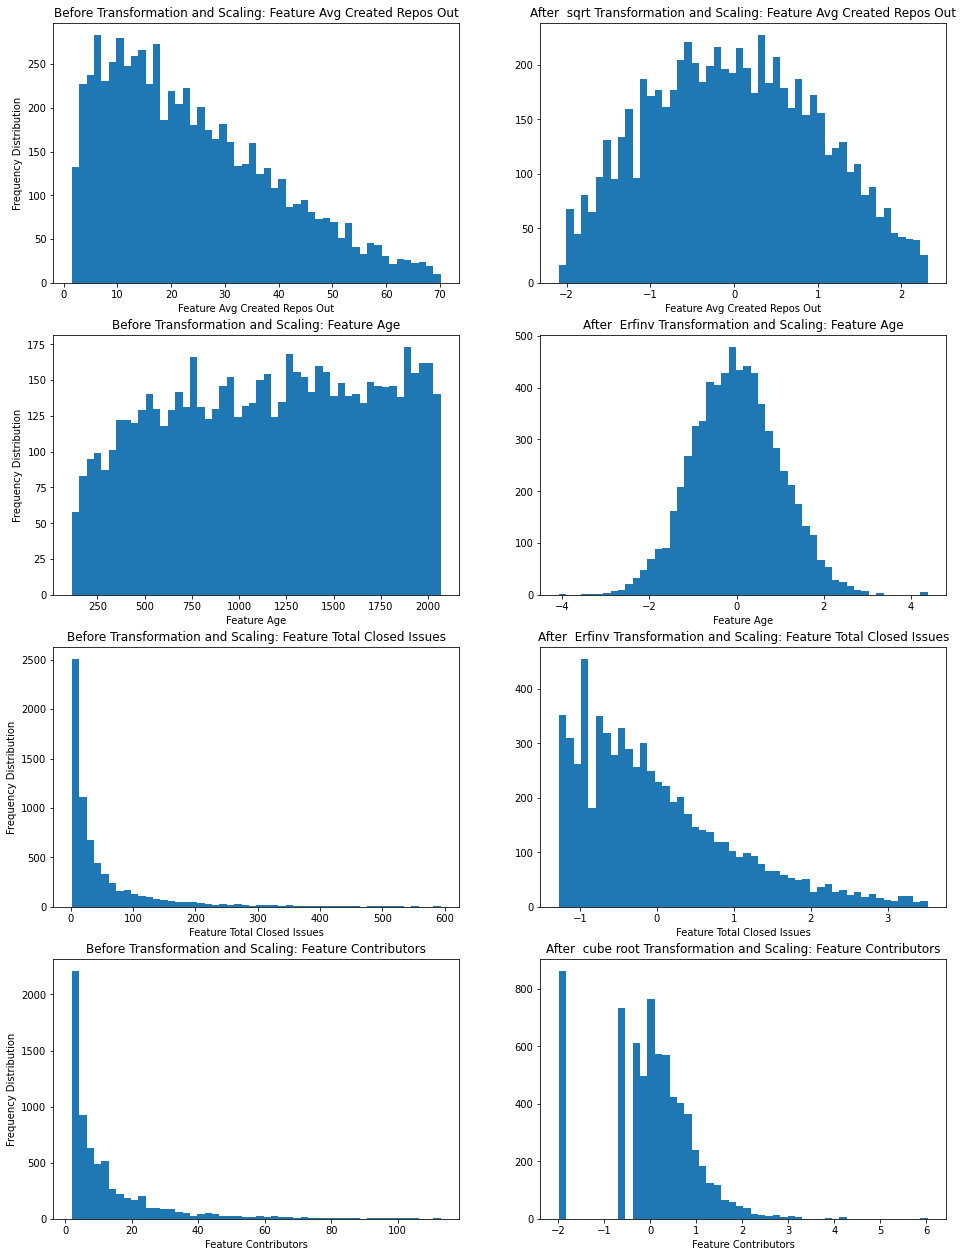

In [94]:
row = 0

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(16, 22))
transformation = ['sqrt','Erfinv','Erfinv','cube root']
for f in ['Avg Created Repos Out', 'Age', 'Total Closed Issues','Contributors']:
  col = 0
  
  axes[row][0].set_title(f"Before Transformation and Scaling: Feature {f}")
  axes[row][1].set_title(f"After  {transformation[row]} Transformation and Scaling: Feature {f}")

  
  axes[row][col].hist(X_final_total_chopped[f],bins= 50)
  axes[row][col].set_xlabel(f"Feature {f}")
  axes[row][0].set_ylabel(f"Frequency Distribution")
  col += 1

  axes[row][col].hist(X_final_final_scaled[f],bins = 50)
  axes[row][col].set_xlabel(f"Feature {f}")
  row += 1

plt.show()

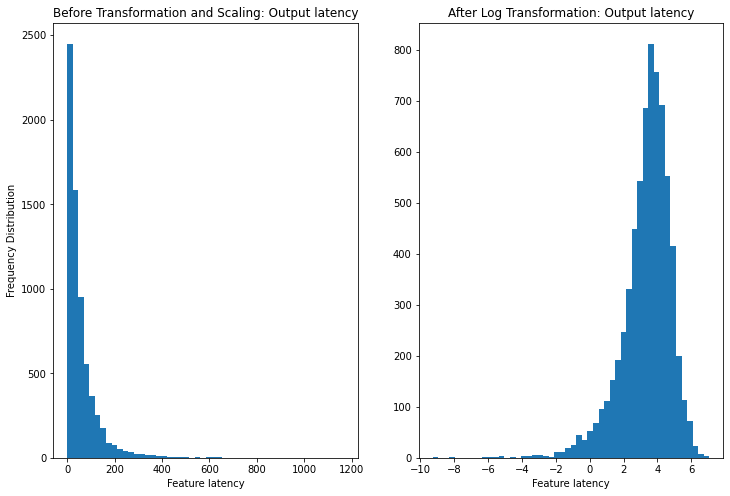

In [99]:
row = 0

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,8))
for f in ['latency']:
  col = 0
  
  axes[0].set_title(f"Before Transformation and Scaling: Output {f}")
  axes[1].set_title(f"After Log Transformation: Output {f}")

  
  axes[col].hist(latency,bins= 50)
  axes[col].set_xlabel(f"Feature {f}")
  axes[0].set_ylabel(f"Frequency Distribution")
  col += 1

  axes[col].hist(np.log(latency),bins = 50)
  axes[col].set_xlabel(f"Feature {f}")
  row += 1

plt.show()

count    6.757000e+03
mean     2.915958e-16
std      1.000074e+00
min     -2.186544e+00
25%     -7.339970e-01
50%      1.934751e-02
75%      7.411300e-01
max      2.174834e+00
Name: Project Size, dtype: float64


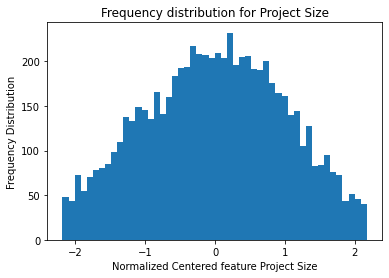

count    6.757000e+03
mean     1.500535e-16
std      1.000074e+00
min     -1.981825e+00
25%     -3.514279e-01
50%      5.036712e-02
75%      6.017341e-01
max      6.030064e+00
Name: Contributors, dtype: float64


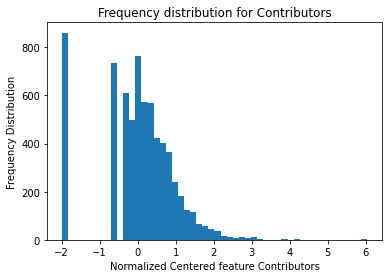

count    6.757000e+03
mean     1.667060e-16
std      1.000074e+00
min     -2.091251e+00
25%     -7.664456e-01
50%     -2.350448e-02
75%      7.543914e-01
max      2.314170e+00
Name: Avg Created Repos Out, dtype: float64


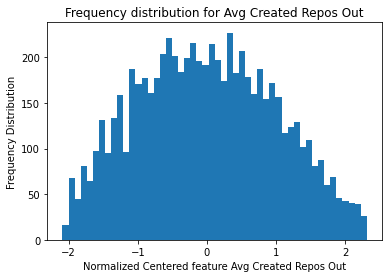

count    6.757000e+03
mean    -2.932882e-16
std      1.000074e+00
min     -1.272591e+00
25%     -7.761248e-01
50%     -2.380932e-01
75%      5.372864e-01
max      3.521287e+00
Name: Total Closed Issues, dtype: float64


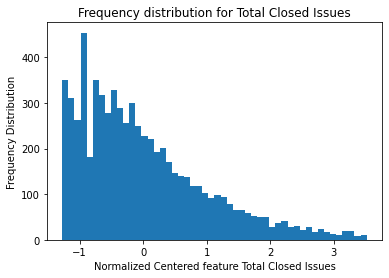

count    6.757000e+03
mean     6.501632e-17
std      1.000074e+00
min     -1.933450e+00
25%     -7.512729e-01
50%     -8.503846e-02
75%      6.138821e-01
max      3.018169e+00
Name: Avg Comments, dtype: float64


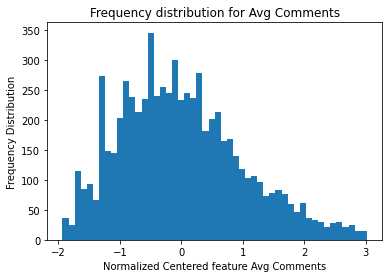

count    6.757000e+03
mean    -5.563602e-16
std      1.000074e+00
min     -4.075087e+00
25%     -6.792649e-01
50%     -1.814690e-02
75%      6.615422e-01
max      4.382381e+00
Name: Age, dtype: float64


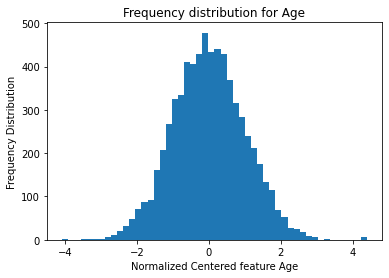

count    6.757000e+03
mean     4.363996e-17
std      1.000074e+00
min     -2.275651e+00
25%     -6.988086e-01
50%     -4.588188e-02
75%      6.847046e-01
max      2.561214e+00
Name: Forks, dtype: float64


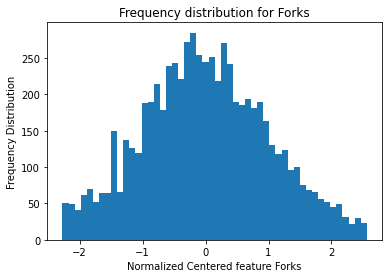

In [ ]:
for f in X_final_final_scaled.columns:
  print(X_final_final_scaled[f].describe())
  plt.figure()
  plt.xlabel(f"Normalized Centered feature {f}")
  plt.ylabel("Frequency Distribution")
  plt.title(f"Frequency distribution for {f}")
  plt.hist(X_final_final_scaled[f],bins= 50)
  plt.show()

# **LATENCY**

In [ ]:
url = X_final_final['Url']
len(url)

6757

In [ ]:
#Question to Prof: Why can't we log the output and regress? (https://stats.idre.ucla.edu/stata/dae/negative-binomial-regression/)

latency = df[df['Url'].isin(url)]['Avg Latency']
latency = latency.reset_index(drop = True)
latency.shape[0]

6757

count    6757.000000
mean       58.199938
std        74.606794
min         0.000093
25%        14.730835
50%        35.853199
75%        72.948772
max      1168.045572
Name: Avg Latency, dtype: float64


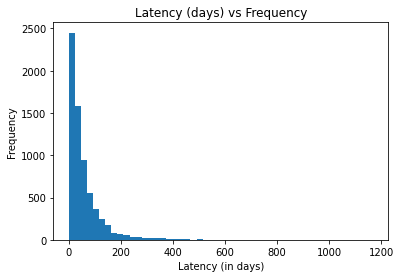

In [ ]:
latency = latency.apply(lambda x: pytimeparse.timeparse.timeparse(x)/86400) #days
print(latency.describe())
plt.figure()
plt.hist(latency,bins=50)
plt.xlabel("Latency (in days)")
plt.ylabel("Frequency")
plt.title("Latency (days) vs Frequency")
plt.show()

count    6757.000000
mean        3.352430
std         1.446630
min        -9.287301
25%         2.689943
50%         3.579433
75%         4.289757
max         7.063087
Name: Avg Latency, dtype: float64


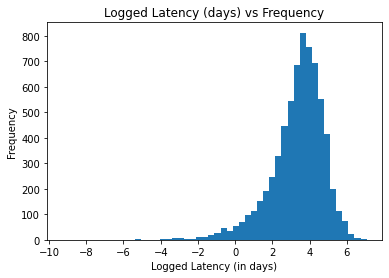

In [ ]:
# Ref: https://medium.com/lcc-unison/how-to-poisson-regression-model-python-implementation-1c672582eb96
y = np.log(latency)
print(y.describe())
plt.figure()
plt.hist(y,bins=50)
plt.xlabel("Logged Latency (in days)")
plt.ylabel("Frequency")
plt.title("Logged Latency (days) vs Frequency")
plt.show()

# **MODELLING: OLS**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b08b53c50>,
      dtype=object)

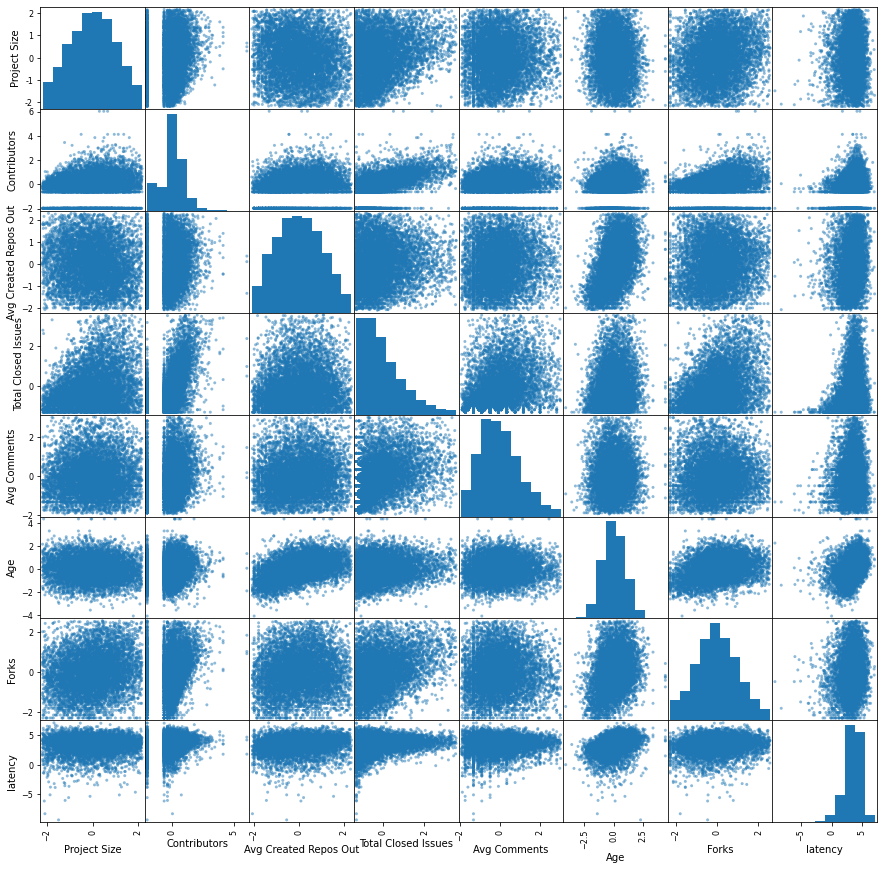

In [ ]:
X_overall = X_final_final_scaled.copy()
X_overall['latency'] = y
pd.plotting.scatter_matrix(X_overall,figsize=(15,15))

In [ ]:
import statsmodels.regression.linear_model as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_final_final_scaled

,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,1.774067,0.050367,0.961518,0.353573,-1.051472,0.758825,0.187573
1,-1.259898,-0.351428,0.052820,-1.052908,0.338161,1.911689,0.657200
2,0.610968,-0.619247,-0.591529,-0.056783,-1.287642,-0.301981,2.157771
3,0.096584,-1.981825,-0.390229,-0.970681,1.496189,-1.080995,-0.488613
4,2.083496,0.509715,-0.276962,-0.834533,-0.134503,-1.399547,2.193952
...,...,...,...,...,...,...,...
6752,1.844287,0.556979,-1.286529,-0.010453,0.444892,-0.556989,-0.241473
6753,-1.278759,-1.981825,-0.314158,-1.272591,-1.729746,1.751845,-0.488613
6754,1.042232,1.486766,-0.712475,1.406478,0.389502,-0.619587,1.099931
6755,-0.073924,0.285248,1.247269,0.117569,-1.606789,2.765744,-0.297448


In [ ]:
y

0       4.856383
1       3.569746
2       2.490893
3       2.459442
4       1.040482
          ...   
6752    4.746103
6753   -0.579126
6754    4.235535
6755    3.375121
6756    3.598242
Name: Avg Latency, Length: 6757, dtype: float64

In [ ]:
model = sm.OLS(y,X_final_final_scaled)
result = model.fit()
result

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Avg Latency   R-squared (uncentered):                   0.027
Model:                            OLS   Adj. R-squared (uncentered):              0.026
Method:                 Least Squares   F-statistic:                              26.73
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                    2.01e-36
Time:                        22:57:40   Log-Likelihood:                         -18246.
No. Observations:                6757   AIC:                                  3.651e+04
Df Residuals:                    6750   BIC:                                  3.655e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Project Size              0.0218      0.046      0.471      0.638      -0.069       0.112
Contributors              0.1990      0.053      3.730      0.000       0.094       0.304
Avg Created Repos Out    -0.0197      0.050     -0.392      0.695      -0.118       0.079
Total Closed Issues       0.1913      0.058      3.324      0.001       0.078       0.304
Avg Comments              0.0160      0.047      0.342      0.732      -0.076       0.108
Age                       0.4604      0.052      8.842      0.000       0.358       0.562
Forks                    -0.0430      0.049     -0.870      0.384      -0.140       0.054
==============================================================================
Omnibus:                     1958.968   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9898.999
Skew:                          -1.306   Prob(JB):                         0.00
Kurtosis:                       8.323   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
result.mse_total

13.331214680124248

# **MODELLING: Poisson Regressor**

In [ ]:
X_final_final_scaled

,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks
0,1.774067,0.050367,0.961518,0.353573,-1.051472,0.758825,0.187573
1,-1.259898,-0.351428,0.052820,-1.052908,0.338161,1.911689,0.657200
2,0.610968,-0.619247,-0.591529,-0.056783,-1.287642,-0.301981,2.157771
3,0.096584,-1.981825,-0.390229,-0.970681,1.496189,-1.080995,-0.488613
4,2.083496,0.509715,-0.276962,-0.834533,-0.134503,-1.399547,2.193952
...,...,...,...,...,...,...,...
6752,1.844287,0.556979,-1.286529,-0.010453,0.444892,-0.556989,-0.241473
6753,-1.278759,-1.981825,-0.314158,-1.272591,-1.729746,1.751845,-0.488613
6754,1.042232,1.486766,-0.712475,1.406478,0.389502,-0.619587,1.099931
6755,-0.073924,0.285248,1.247269,0.117569,-1.606789,2.765744,-0.297448


In [ ]:
from sklearn import linear_model
poisson = linear_model.PoissonRegressor()
poisson.fit(X_final_final_scaled,latency)

PoissonRegressor()

In [ ]:
poisson.score(X_final_final_scaled, latency)

0.16274376114218114

In [ ]:
poisson.coef_

array([-0.00453533,  0.09946593, -0.01084338, -0.04369898, -0.06609018,
        0.39252526,  0.00260689])

In [ ]:
poisson.intercept_

3.979539371237456

# **MODEL Newer stuff**

In [ ]:
import statsmodels.api as sm2

In [ ]:
latency

0       128.558326
1        35.507590
2        12.072053
3        11.698280
4         2.830580
           ...    
6752    115.134776
6753      0.560388
6754     69.098611
6755     29.227813
6756     36.533958
Name: Avg Latency, Length: 6757, dtype: float64

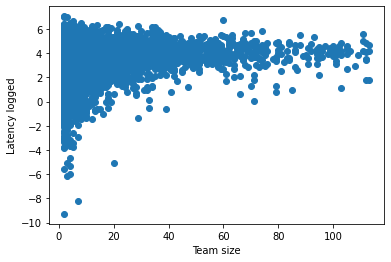

In [ ]:
plt.figure()
plt.scatter(team_size,np.log(latency))
plt.xlabel("Team size")
plt.ylabel("Latency logged")
plt.show()

In [ ]:
X_final_final_scaled.shape

(6757, 7)

In [ ]:
import statsmodels.api as sm2
R2_best = []
degree = 15
for d in range(1,21):

  x = X_final_final_scaled
  # X = np.column_stack(#((x, x**2))
  tuple_final = tuple([x**i for i in range(1,d+1)])

  X_d = np.column_stack(tuple_final)
  print("Num features for ", d, " is X_d is: ",X_d.shape)

  X_d = sm2.add_constant(X_d)

  model = sm.OLS(np.log(latency), X_d)
  results = model.fit()
  R2_best.append(results.rsquared)

R2_best

Num features for  1  is X_d is:  (6757, 7)
Num features for  2  is X_d is:  (6757, 14)
Num features for  3  is X_d is:  (6757, 21)
Num features for  4  is X_d is:  (6757, 28)
Num features for  5  is X_d is:  (6757, 35)
Num features for  6  is X_d is:  (6757, 42)
Num features for  7  is X_d is:  (6757, 49)
Num features for  8  is X_d is:  (6757, 56)
Num features for  9  is X_d is:  (6757, 63)
Num features for  10  is X_d is:  (6757, 70)
Num features for  11  is X_d is:  (6757, 77)
Num features for  12  is X_d is:  (6757, 84)
Num features for  13  is X_d is:  (6757, 91)
Num features for  14  is X_d is:  (6757, 98)
Num features for  15  is X_d is:  (6757, 105)
Num features for  16  is X_d is:  (6757, 112)
Num features for  17  is X_d is:  (6757, 119)
Num features for  18  is X_d is:  (6757, 126)
Num features for  19  is X_d is:  (6757, 133)
Num features for  20  is X_d is:  (6757, 140)


[0.17187613973271854,
 0.20530074309859792,
 0.2184230468365106,
 0.2252765171144978,
 0.22742700245785907,
 0.22993131974484815,
 0.23061848954456654,
 0.2311306140631425,
 0.23211432637774654,
 0.23364741257659394,
 0.23423194496031996,
 0.23518002611782796,
 0.23570058878296285,
 0.2368471778389114,
 0.23796725675891806,
 0.2392120634591527,
 0.2403800607989781,
 0.23990924944251957,
 0.2384311848113384,
 0.2373715631070924]

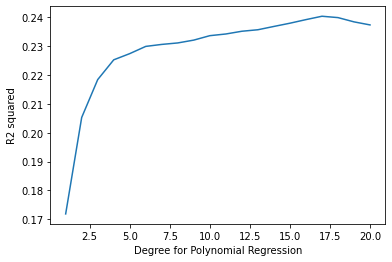

In [ ]:
plt.xlabel("Degree for Polynomial Regression")
plt.ylabel("R2 squared")
plt.plot(range(1,21),R2_best)
plt.show()

In [ ]:
X_model = X_final_final_scaled.copy()
cols = X_final_final_scaled.columns.tolist()
final_degree = 5
for i in range(2,final_degree + 1):
  for col in cols:
    X_model[col + "_deg_" + str(i)] = X_model[col].apply(lambda x: x**i)

X_model

,Project Size,Contributors,Avg Created Repos Out,Total Closed Issues,Avg Comments,Age,Forks,Project Size_deg_2,Contributors_deg_2,Avg Created Repos Out_deg_2,Total Closed Issues_deg_2,Avg Comments_deg_2,Age_deg_2,Forks_deg_2,Project Size_deg_3,Contributors_deg_3,Avg Created Repos Out_deg_3,Total Closed Issues_deg_3,Avg Comments_deg_3,Age_deg_3,Forks_deg_3,Project Size_deg_4,Contributors_deg_4,Avg Created Repos Out_deg_4,Total Closed Issues_deg_4,Avg Comments_deg_4,Age_deg_4,Forks_deg_4,Project Size_deg_5,Contributors_deg_5,Avg Created Repos Out_deg_5,Total Closed Issues_deg_5,Avg Comments_deg_5,Age_deg_5,Forks_deg_5
0,1.774067,0.050367,0.961518,0.353573,-1.051472,0.758825,0.187573,3.147312,0.002537,0.924517,0.125014,1.105594,0.575815,0.035184,5.583541,0.000128,0.888940,0.044202,-1.162502,0.436942,0.006600,9.905573,0.000006,0.854732,1.562847e-02,1.222339,0.331563,0.001238,17.573145,3.241422e-07,8.218401e-01,5.525806e-03,-1.285256,0.251598,0.000232
1,-1.259898,-0.351428,0.052820,-1.052908,0.338161,1.911689,0.657200,1.587343,0.123502,0.002790,1.108616,0.114353,3.654555,0.431912,-1.999890,-0.043402,0.000147,-1.167271,0.038670,6.986374,0.283852,2.519657,0.015253,0.000008,1.229029e+00,0.013077,13.355775,0.186548,-3.174511,-5.360205e-03,4.111492e-07,-1.294055e+00,0.004422,25.532089,0.122599
2,0.610968,-0.619247,-0.591529,-0.056783,-1.287642,-0.301981,2.157771,0.373282,0.383467,0.349906,0.003224,1.658021,0.091192,4.655978,0.228063,-0.237461,-0.206980,-0.000183,-2.134937,-0.027538,10.046535,0.139339,0.147047,0.122434,1.039628e-05,2.749035,0.008316,21.678127,0.085132,-9.105845e-02,-7.242344e-02,-5.903335e-07,-3.539772,-0.002511,46.776443
3,0.096584,-1.981825,-0.390229,-0.970681,1.496189,-1.080995,-0.488613,0.009329,3.927631,0.152279,0.942222,2.238582,1.168551,0.238743,0.000901,-7.783878,-0.059424,-0.914598,3.349342,-1.263198,-0.116653,0.000087,15.426286,0.023189,8.877832e-01,5.011250,1.365512,0.056998,0.000008,-3.057220e+01,-9.048929e-03,-8.617547e-01,7.497778,-1.476112,-0.027850
4,2.083496,0.509715,-0.276962,-0.834533,-0.134503,-1.399547,2.193952,4.340954,0.259809,0.076708,0.696446,0.018091,1.958731,4.813426,9.044359,0.132429,-0.021245,-0.581207,-0.002433,-2.741335,10.560426,18.843883,0.067501,0.005884,4.850363e-01,0.000327,3.836626,23.169070,39.261148,3.440625e-02,-1.629689e-03,-4.047789e-01,-0.000044,-5.369537,50.831830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,1.844287,0.556979,-1.286529,-0.010453,0.444892,-0.556989,-0.241473,3.401394,0.310225,1.655156,0.000109,0.197929,0.310237,0.058309,6.273146,0.172789,-2.129405,-0.000001,0.088057,-0.172798,-0.014080,11.569480,0.096240,2.739540,1.193937e-08,0.039176,0.096247,0.003400,21.337440,5.360351e-02,-3.524497e+00,-1.248035e-10,0.017429,-0.053608,-0.000821
6753,-1.278759,-1.981825,-0.314158,-1.272591,-1.729746,1.751845,-0.488613,1.635224,3.927631,0.098696,1.619489,2.992021,3.068962,0.238743,-2.091057,-7.783878,-0.031006,-2.060948,-5.175437,5.376346,-0.116653,2.673957,15.426286,0.009741,2.622745e+00,8.952192,9.418526,0.056998,-3.419346,-3.057220e+01,-3.060155e-03,-3.337683e+00,-15.485019,16.499799,-0.027850
6754,1.042232,1.486766,-0.712475,1.406478,0.389502,-0.619587,1.099931,1.086247,2.210473,0.507621,1.978179,0.151712,0.383889,1.209848,1.132121,3.286456,-0.361668,2.782265,0.059092,-0.237853,1.330750,1.179932,4.886190,0.257679,3.913193e+00,0.023017,0.147370,1.463733,1.229762,7.264621e+00,-1.835901e-01,5.503818e+00,0.008965,-0.091309,1.610005
6755,-0.073924,0.285248,1.247269,0.117569,-1.606789,2.765744,-0.297448,0.005465,0.081366,1.555681,0.013822,2.581772,7.649342,0.088475,-0.000404,0.023210,1.940353,0.001625,-4.148364,21.156127,-0.026317,0.000030,0.006621,2.420143,1.910592e-04,6.665548,58.512440,0.007828,-0.000002,1.888486e-03,3.018570e+00,2.246260e-05,-10.710132,161.830458,-0.002328


In [ ]:
X_model_d = sm2.add_constant(X_model)
model = sm.OLS(np.log(latency),X_model_d)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg Latency   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     56.53
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:57:44   Log-Likelihood:                -11210.
No. Observations:                6757   AIC:                         2.249e+04
Df Residuals:                    6721   BIC:                         2.274e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.6769      0.048     77.126      0.000       3.583       3.770
Project Size                    0.0167      0.052      0.320      0.749      -0.086       0.119
Contributors                    0.2412      0.049      4.925      0.000       0.145       0.337
Avg Created Repos Out          -0.1093      0.052     -2.084      0.037      -0.212      -0.007
Total Closed Issues            -0.0739      0.049     -1.498      0.134      -0.171       0.023
Avg Comments                   -0.0670      0.042     -1.606      0.108      -0.149       0.015
Age                             0.5377      0.033     16.162      0.000       0.472       0.603
Forks                          -0.0425      0.047     -0.908      0.364      -0.134       0.049
Project Size_deg_2              0.0021      0.041      0.052      0.959      -0.079       0.083
Contributors_deg_2              0.0461      0.046      1.000      0.318      -0.044       0.136
Avg Created Repos Out_deg_2     0.0309      0.043      0.712      0.476      -0.054       0.116
Total Closed Issues_deg_2      -0.1460      0.060     -2.428      0.015      -0.264      -0.028
Avg Comments_deg_2             -0.0321      0.050     -0.643      0.520      -0.130       0.066
Age_deg_2                      -0.1394      0.020     -6.815      0.000      -0.180      -0.099
Forks_deg_2                    -0.0176      0.036     -0.492      0.623      -0.088       0.053
Project Size_deg_3              0.0084      0.049      0.170      0.865      -0.088       0.105
Contributors_deg_3             -0.0148      0.011     -1.344      0.179      -0.036       0.007
Avg Created Repos Out_deg_3     0.0454      0.049      0.928      0.353      -0.051       0.141
Total Closed Issues_deg_3       0.3208      0.030     10.656      0.000       0.262       0.380
Avg Comments_deg_3              0.0339      0.029      1.158      0.247      -0.023       0.091
Age_deg_3                      -0.0201      0.013     -1.533      0.125      -0.046       0.006
Forks_deg_3                    -0.0079      0.037     -0.214      0.831      -0.080       0.064
Project Size_deg_4             -0.0084      0.011     -0.762      0.446      -0.030       0.013
Contributors_deg_4             -0.0066      0.010     -0.688      0.492      -0.025       0.012
Avg Created Repos Out_deg_4    -0.0032      0.012     -0.261      0.794      -0.027       0.021
Total Closed Issues_deg_4      -0.1697      0.030     -5.678      0.000      -0.228      -0.111
Avg Comments_deg_4              0.0156      0.016      0.970      0.332      -0.016       0.047
Age_deg_4                       0.0076      0.003      2.846      0.004       0.002       0.013
Forks_deg_4                    -0.0024      0.008     -0.298      0.766      -0.018       0.014
Project Siz

In [ ]:
import collections

p_vals = dict(results.pvalues)
final = dict(sorted(p_vals.items(), key=lambda item: item[1]))
sorted_dict = collections.OrderedDict(final)
sorted_dict

OrderedDict([('const', 0.0),
             ('Age', 1.1311884177752578e-57),
             ('Total Closed Issues_deg_3', 2.636162520390717e-26),
             ('Age_deg_2', 1.0262632975254726e-11),
             ('Total Closed Issues_deg_4', 1.4186483839046913e-08),
             ('Contributors', 8.641556398085457e-07),
             ('Total Closed Issues_deg_5', 5.6703028018965073e-05),
             ('Age_deg_4', 0.004444374509368526),
             ('Total Closed Issues_deg_2', 0.015225544496716807),
             ('Avg Created Repos Out', 0.03715962571836386),
             ('Avg Comments', 0.10829766871701671),
             ('Age_deg_3', 0.12522921837574696),
             ('Total Closed Issues', 0.13426812869500024),
             ('Contributors_deg_3', 0.17895646288152284),
             ('Avg Comments_deg_3', 0.24680557216780954),
             ('Avg Comments_deg_5', 0.25548796578108673),
             ('Contributors_deg_2', 0.3175531871460387),
             ('Avg Comments_deg_4', 0.3318813750

In [ ]:
p_val_sig = 0.05
pairs = [(k,v) for k,v in sorted_dict.items() if v < p_val_sig]
dict(pairs)

{'Age': 1.1311884177752578e-57,
 'Age_deg_2': 1.0262632975254726e-11,
 'Age_deg_4': 0.004444374509368526,
 'Avg Created Repos Out': 0.03715962571836386,
 'Contributors': 8.641556398085457e-07,
 'Total Closed Issues_deg_2': 0.015225544496716807,
 'Total Closed Issues_deg_3': 2.636162520390717e-26,
 'Total Closed Issues_deg_4': 1.4186483839046913e-08,
 'Total Closed Issues_deg_5': 5.6703028018965073e-05,
 'const': 0.0}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Avg Latency   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     56.53
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:57:44   Log-Likelihood:                -11210.
No. Observations:                6757   AIC:                         2.249e+04
Df Residuals:                    6721   BIC:                         2.274e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.6769      0.048     77.126      0.000       3.583       3.770
Project Size                    0.0167      0.052      0.320      0.749      -0.086       0.119
Contributors                    0.2412      0.049      4.925      0.000       0.145       0.337
Avg Created Repos Out          -0.1093      0.052     -2.084      0.037      -0.212      -0.007
Total Closed Issues            -0.0739      0.049     -1.498      0.134      -0.171       0.023
Avg Comments                   -0.0670      0.042     -1.606      0.108      -0.149       0.015
Age                             0.5377      0.033     16.162      0.000       0.472       0.603
Forks                          -0.0425      0.047     -0.908      0.364      -0.134       0.049
Project Size_deg_2              0.0021      0.041      0.052      0.959      -0.079       0.083
Contributors_deg_2              0.0461      0.046      1.000      0.318      -0.044       0.136
Avg Created Repos Out_deg_2     0.0309      0.043      0.712      0.476      -0.054       0.116
Total Closed Issues_deg_2      -0.1460      0.060     -2.428      0.015      -0.264      -0.028
Avg Comments_deg_2             -0.0321      0.050     -0.643      0.520      -0.130       0.066
Age_deg_2                      -0.1394      0.020     -6.815      0.000      -0.180      -0.099
Forks_deg_2                    -0.0176      0.036     -0.492      0.623      -0.088       0.053
Project Size_deg_3              0.0084      0.049      0.170      0.865      -0.088       0.105
Contributors_deg_3             -0.0148      0.011     -1.344      0.179      -0.036       0.007
Avg Created Repos Out_deg_3     0.0454      0.049      0.928      0.353      -0.051       0.141
Total Closed Issues_deg_3       0.3208      0.030     10.656      0.000       0.262       0.380
Avg Comments_deg_3              0.0339      0.029      1.158      0.247      -0.023       0.091
Age_deg_3                      -0.0201      0.013     -1.533      0.125      -0.046       0.006
Forks_deg_3                    -0.0079      0.037     -0.214      0.831      -0.080       0.064
Project Size_deg_4             -0.0084      0.011     -0.762      0.446      -0.030       0.013
Contributors_deg_4             -0.0066      0.010     -0.688      0.492      -0.025       0.012
Avg Created Repos Out_deg_4    -0.0032      0.012     -0.261      0.794      -0.027       0.021
Total Closed Issues_deg_4      -0.1697      0.030     -5.678      0.000      -0.228      -0.111
Avg Comments_deg_4              0.0156      0.016      0.970      0.332      -0.016       0.047
Age_deg_4                       0.0076      0.003      2.846      0.004       0.002       0.013
Forks_deg_4                    -0.0024      0.008     -0.298      0.766      -0.018       0.014
Project Siz